#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [12]:
# Reading the image plaksha_Faculty.jpg
img = cv2.imread('plaksha_Faculty.jpg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
if face_cascade.empty():
    raise IOError("Failed to load Haar cascade XML file. Check the file path.")### NOTE HAD TO MAKE THIS ADDITION ,THOUGH LAB PDF ASKED NOT TO ADD BEYOND FILL UPS, SOME ERROR IN LOADING THUS GPT SUGGESTED THIS CHANGE, 

# Applying the face detection method on the grayscale image. 
# Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

# Define the text and font parameters
text = "Face"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.7
font_color = (0, 0, 255)
font_thickness = 2

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)

# Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

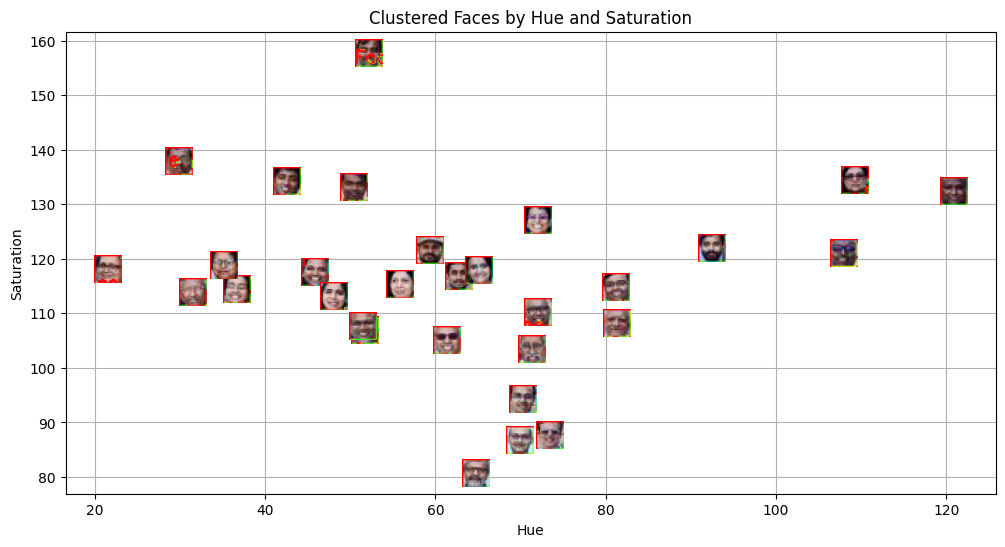

In [13]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o')

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Clustered Faces by Hue and Saturation')
plt.grid(True)
plt.show()

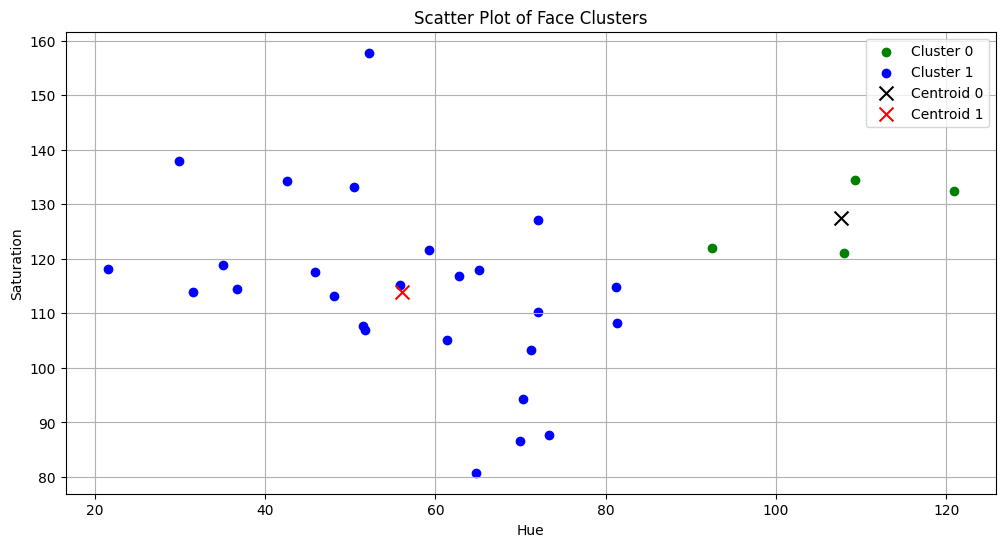

In [14]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='black', marker='x', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='x', s=100, label='Centroid 1')

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Scatter Plot of Face Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.05, 4, minSize=(25,25), maxSize=(50,50))
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow('Template Face Detection', template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

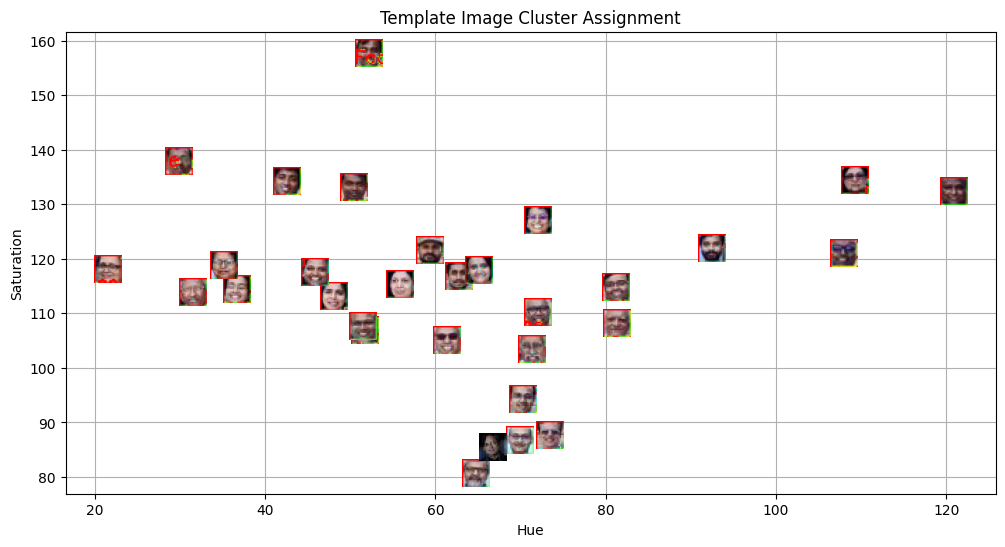

In [ ]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict(np.array([[template_hue, template_saturation]]))[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Template Image Cluster Assignment')
plt.grid(True)
plt.show()

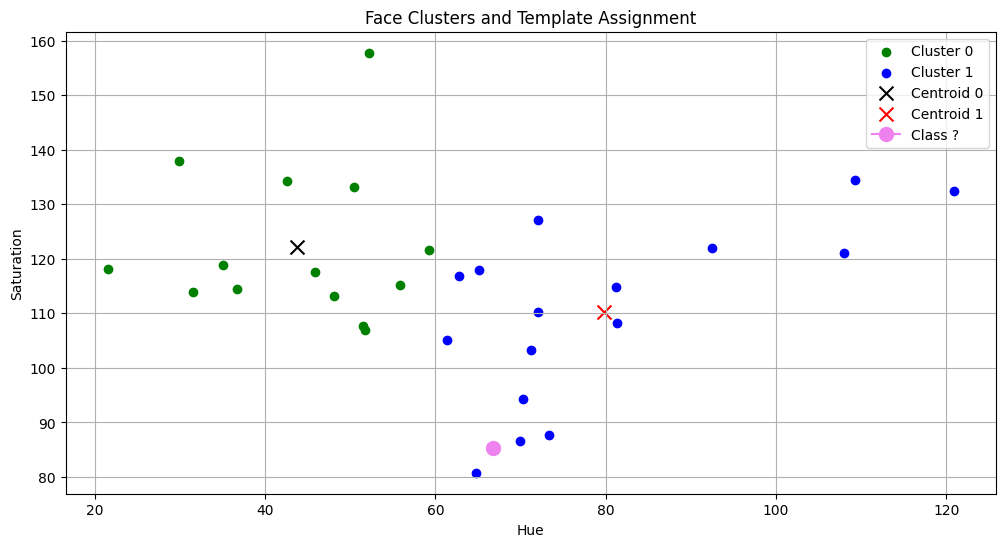

In [ ]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], color='black', marker='x', s=100, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='x', s=100, label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label='Class ?')

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Face Clusters and Template Assignment')
plt.legend()
plt.grid(True)
plt.show()

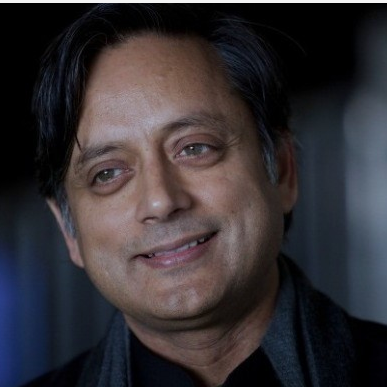

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms?
Metric 1: Euclidean distance
Why Euclidean?
Measures straight-line distance between points; intuitive and widely used.
Effect
Sensitive to scale and outliers; works best when features are normalized.

Metric 2: Manhattan distance
Why Manhattan?
Measures sum of absolute differences; useful for grid-like data.
Effect
Less sensitive to outliers; can handle high-dimensional data better.

Metric 3: Minkowski distance
Why Minkowski?
Generalizes Euclidean and Manhattan; allows flexibility with parameter p.
Effect
Choice of p affects sensitivity to feature differences.

Metric 4: Cosine distance
Why Cosine?
Measures angle between vectors; useful for text and high-dimensional data.
Effect
Ignores magnitude; focuses on orientation.
---
#### 2. What are some real-world applications of distance-based classification algorithms?
Image recognition
Why distance-based?
Compares pixel or feature vectors.
Use:
Face, object, and handwriting recognition.

Medical diagnosis
Why distance-based?
Compares patient data to known cases.
Use:
Disease classification, anomaly detection.

Document classification
Why distance-based?
Compares word frequency vectors.
Use:
Spam detection, topic categorization.

Recommender systems
Why distance-based?
Compares user/item profiles.
Use:
Product, movie, and content recommendations.
---
#### 3. Explain various distance metrics.
Euclidean distance
Why?
Straight-line distance; most common.
Effect:
Sensitive to scale; requires normalization.

Manhattan distance
Why?
Sum of absolute differences; robust to outliers.
Effect:
Useful for sparse or grid data.

Minkowski distance
Why?
Generalized metric; parameter p.
Effect:
Flexible; p=1 (Manhattan), p=2 (Euclidean).

Cosine distance
Why?
Measures angle; ignores magnitude.
Effect:
Good for text and high-dimensional data.

Mahalanobis distance
Why?
Accounts for feature correlation.
Effect:
Useful for multivariate data; requires covariance matrix.
---
#### 4. What is the role of cross validation in model performance?
Role: Model evaluation
Why cross validation?
Splits data into training and testing sets multiple times.
Effect:
Provides unbiased estimate of model performance; reduces overfitting risk.

Role: Hyperparameter tuning
Why?
Tests different parameter values.
Effect:
Helps select best model settings; improves generalization.

Role: Model selection
Why?
Compares multiple algorithms.
Effect:
Identifies most suitable model for the task.
---
#### 5. Explain variance and bias in terms of KNN?
Variance
Why variance?
Measures sensitivity to training data changes.
Effect:
KNN with low k has high variance; model changes with new data.

Bias
Why bias?
Measures error due to model assumptions.
Effect:
KNN with high k has high bias; predictions are averaged, less sensitive to local structure.

Trade-off
Why trade-off?
Balance between bias and variance.
Effect:
Optimal k minimizes both; too low k overfits, too high k underfits.